## Advanced Numpy

* How numpy internally stores an array?
* A pointer to the data
* A tuple containing shape of the array
* Data Type
* Stride information(crucial!), tells numpy how many bytes to move in order to get the next element.!
* Very important: Numpy slicing does not produce a new copy. Copyless arrays are an important feature.

` While it is rare that a typical NumPy user would be interested in the array strides,
they are the critical ingredient in constructing copyless array views. Strides can
even be negative which enables an array to move backward through memory. `

In [1]:
import numpy as np
from IPython.display import Image

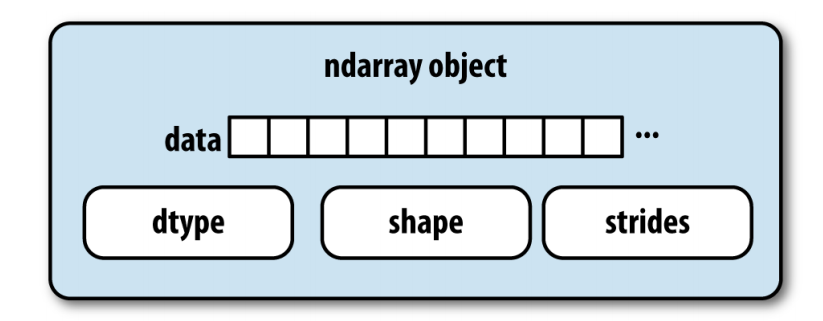

In [7]:
Image('numpy.PNG')

In [8]:
np.ones((10, 5)).dtype

dtype('float64')

In [3]:
np.ones((10, 5)).shape

(10L, 5L)

In [4]:
np.ones((3, 4, 5), dtype=np.float64).strides

(160L, 40L, 8L)

##### Reshaping arrays

In [3]:
arr = np.arange(15)

In [4]:
arr.reshape((5, -1))
# automatically inferred

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

##### Flattening arrays

In [5]:
arr = np.arange(15)

In [7]:
arr = arr.reshape((5, -1))

Flatten returns a copy of the data, where as ravel does not.

In [8]:
arr.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [9]:
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

##### Numpy array order: C versus Fortran

* By default, NumPy arrays are created in row major order.
* This means that if you have a two-dimensional array of data, the items in each row of the array are stored in adjacent memory locations.
* C and Fortran: Row and Column major order

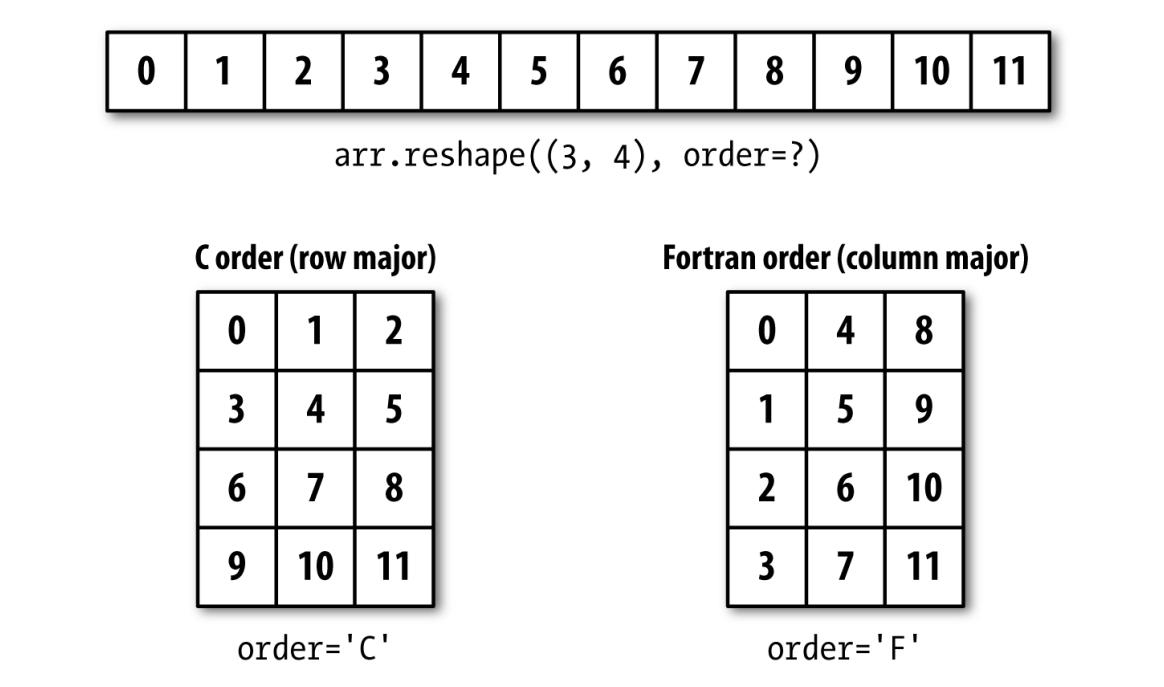

In [10]:
Image('order.PNG')

##### Concatenating Arrays

In [11]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])

In [13]:
arr1

array([[1, 2, 3],
       [4, 5, 6]])

In [14]:
arr2

array([[ 7,  8,  9],
       [10, 11, 12]])

In [12]:
np.concatenate([arr1, arr2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [15]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [16]:
np.vstack((arr1, arr2))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [17]:
np.hstack((arr1, arr2))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

##### Splitting Arrays

In [6]:
from numpy.random import randn

In [19]:
arr = randn(5,2)

In [20]:
arr

array([[ 0.28359024,  0.35679691],
       [ 0.14881802, -0.0112614 ],
       [-1.08933767, -0.83730028],
       [-1.07379465,  0.68919675],
       [ 1.41756245, -1.62409296]])

In [21]:
f, s, t = np.split(arr,[1,3])

In [22]:
f

array([[ 0.28359024,  0.35679691]])

In [23]:
s

array([[ 0.14881802, -0.0112614 ],
       [-1.08933767, -0.83730028]])

In [24]:
t

array([[-1.07379465,  0.68919675],
       [ 1.41756245, -1.62409296]])

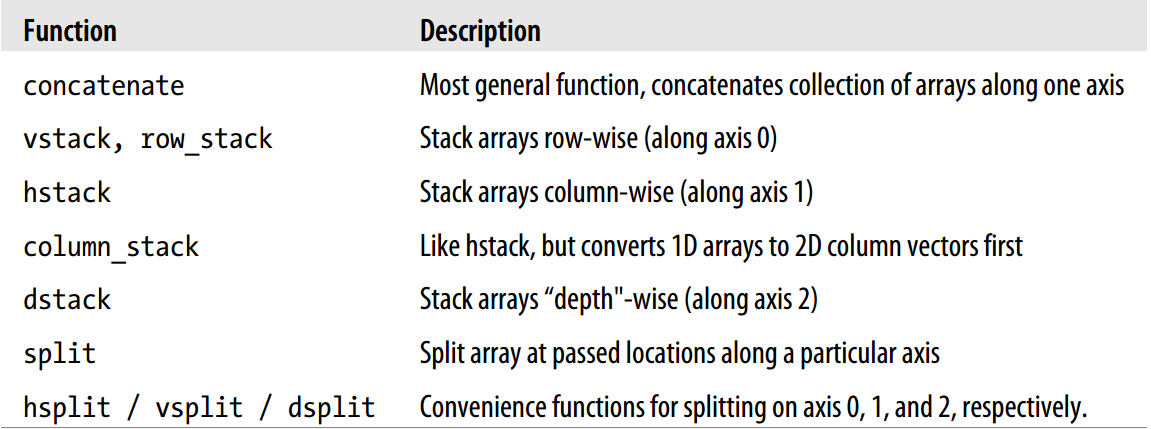

In [25]:
Image('array_con.PNG')

##### Stacking helpers r_ and c_

* Most of the algorithms require an additional row or column added to the array. Stacking helpers r_ and c_ do exactly that. I can not stress how important this will be.

In [26]:
arr = np.arange(6)

In [27]:
arr1 = arr.reshape((3, 2))

In [28]:
arr2 = randn(3, 2)

In [29]:
np.r_[arr1, arr2]

array([[ 0.        ,  1.        ],
       [ 2.        ,  3.        ],
       [ 4.        ,  5.        ],
       [-0.8985867 ,  1.77430652],
       [-0.42234751,  0.41814571],
       [-1.2352571 ,  1.66284479]])

In [30]:
np.c_[np.r_[arr1, arr2], arr]

array([[ 0.        ,  1.        ,  0.        ],
       [ 2.        ,  3.        ,  1.        ],
       [ 4.        ,  5.        ,  2.        ],
       [-0.8985867 ,  1.77430652,  3.        ],
       [-0.42234751,  0.41814571,  4.        ],
       [-1.2352571 ,  1.66284479,  5.        ]])

##### Repeating elements: Tile and Repeat

Repeat replicates each element in an array some number of times, producing a larger array.

In [31]:
arr = np.arange(3)

In [32]:
np.repeat(arr,3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [33]:
arr.repeat([2,3,4])

array([0, 0, 1, 1, 1, 2, 2, 2, 2])

In [34]:
arr = randn(2,2)

In [35]:
arr

array([[ 0.01125683, -0.46581891],
       [-0.4487138 ,  0.23219751]])

In [36]:
arr.repeat(2,axis=0)

array([[ 0.01125683, -0.46581891],
       [ 0.01125683, -0.46581891],
       [-0.4487138 ,  0.23219751],
       [-0.4487138 ,  0.23219751]])

In [37]:
arr.repeat(2,axis=1)

array([[ 0.01125683,  0.01125683, -0.46581891, -0.46581891],
       [-0.4487138 , -0.4487138 ,  0.23219751,  0.23219751]])

In [39]:
arr.repeat([5,1],axis=0)

array([[ 0.01125683, -0.46581891],
       [ 0.01125683, -0.46581891],
       [ 0.01125683, -0.46581891],
       [ 0.01125683, -0.46581891],
       [ 0.01125683, -0.46581891],
       [-0.4487138 ,  0.23219751]])

Tile, on the other hand, is a shortcut for stacking copies of an array along an axis. You can visually think about it as like “laying down tiles”.

In [40]:
np.tile(arr, 2)

array([[ 0.01125683, -0.46581891,  0.01125683, -0.46581891],
       [-0.4487138 ,  0.23219751, -0.4487138 ,  0.23219751]])

In [41]:
np.tile(arr, (2, 1)) 

array([[ 0.01125683, -0.46581891],
       [-0.4487138 ,  0.23219751],
       [ 0.01125683, -0.46581891],
       [-0.4487138 ,  0.23219751]])

In [42]:
np.tile(arr, (3, 2))

array([[ 0.01125683, -0.46581891,  0.01125683, -0.46581891],
       [-0.4487138 ,  0.23219751, -0.4487138 ,  0.23219751],
       [ 0.01125683, -0.46581891,  0.01125683, -0.46581891],
       [-0.4487138 ,  0.23219751, -0.4487138 ,  0.23219751],
       [ 0.01125683, -0.46581891,  0.01125683, -0.46581891],
       [-0.4487138 ,  0.23219751, -0.4487138 ,  0.23219751]])

##### Fancy indexing: Take and Put

In [43]:
arr = np.arange(10) * 100

In [44]:
arr

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

In [45]:
inds = [7, 1, 2, 6]

In [46]:
arr[inds]

array([700, 100, 200, 600])

In [47]:
arr.take(inds)

array([700, 100, 200, 600])

In [49]:
arr.put(inds,42)

In [50]:
arr

array([  0,  42,  42, 300, 400, 500,  42,  42, 800, 900])

##### Broadcasting

* Broadcasting describes how arithmetic works between arrays of different shapes. 
* It is a very powerful feature, but one that can be easily misunderstood, even by experienced users.
* To implement fast and efficient algorithms, one has to get rid of the Python loops. Vectorizing code is a little tricky, and so is broadcasting.

In [51]:
arr = np.arange(4)

In [52]:
arr

array([0, 1, 2, 3])

In [53]:
arr*4

array([ 0,  4,  8, 12])

* The scalar 4 is broadcasted to each element of the array. Internally, numpy expands the dimension of the scalar and tries to use a vectorized operation thats written in C. 
* You have to pay some price for using a high level language like Python, but numpy tries to reduce that price by using precompiled code in C.

In [54]:
arr = randn(4,3)

In [55]:
arr

array([[ 0.1243957 ,  0.0681439 ,  1.28128796],
       [ 0.6784056 ,  0.19317847,  0.56162636],
       [-0.65297666,  0.22105882, -0.1006727 ],
       [-0.79476962, -1.03623322,  0.63788785]])

In [56]:
arr.mean(0)

array([-0.16123625, -0.13846301,  0.59503237])

In [57]:
demeaned = arr - arr.mean(0)

In [58]:
demeaned

array([[ 0.28563194,  0.20660691,  0.68625559],
       [ 0.83964185,  0.33164148, -0.03340601],
       [-0.49174042,  0.35952183, -0.69570507],
       [-0.63353338, -0.89777021,  0.04285549]])

In [59]:
demeaned.mean(0)

array([ 0.,  0.,  0.])

** Two arrays are compatible for broadcasting if for each trailing dimension (that is, starting from the end), the axis lengths match or if either of the lengths is 1. Broadcasting
is then performed over the missing and / or length 1 dimensions. **

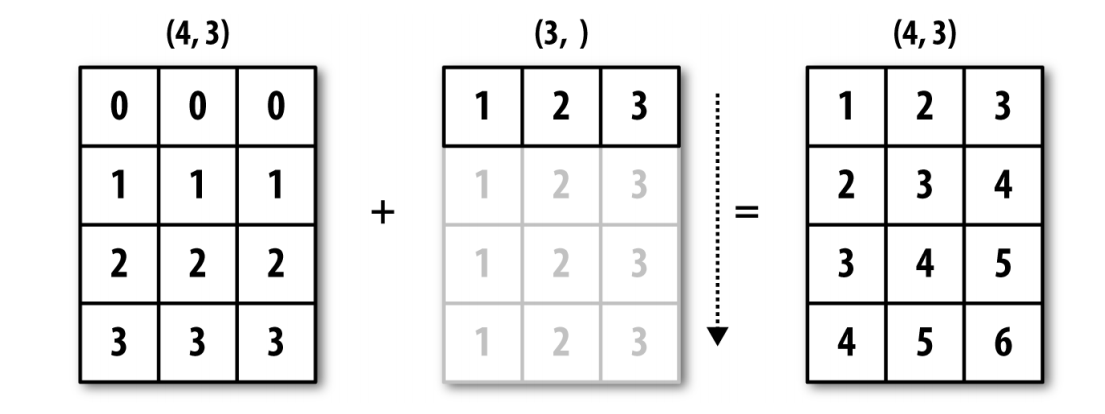

In [60]:
Image('broad.PNG')

In [61]:
row_means = arr.mean(1)

In [62]:
row_means.reshape((4, 1))

array([[ 0.49127585],
       [ 0.47773681],
       [-0.17753018],
       [-0.397705  ]])

In [63]:
demeaned = arr - row_means.reshape((4, 1))

In [64]:
demeaned.mean(1)

array([  0.00000000e+00,   3.70074342e-17,  -9.25185854e-18,
         0.00000000e+00])

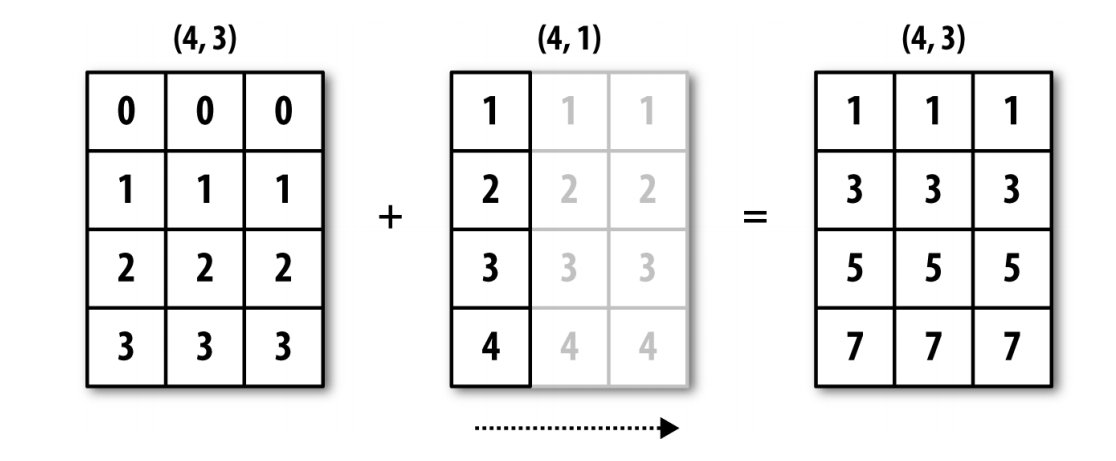

In [65]:
Image('broad2.PNG')

##### Broadcasting over other axes

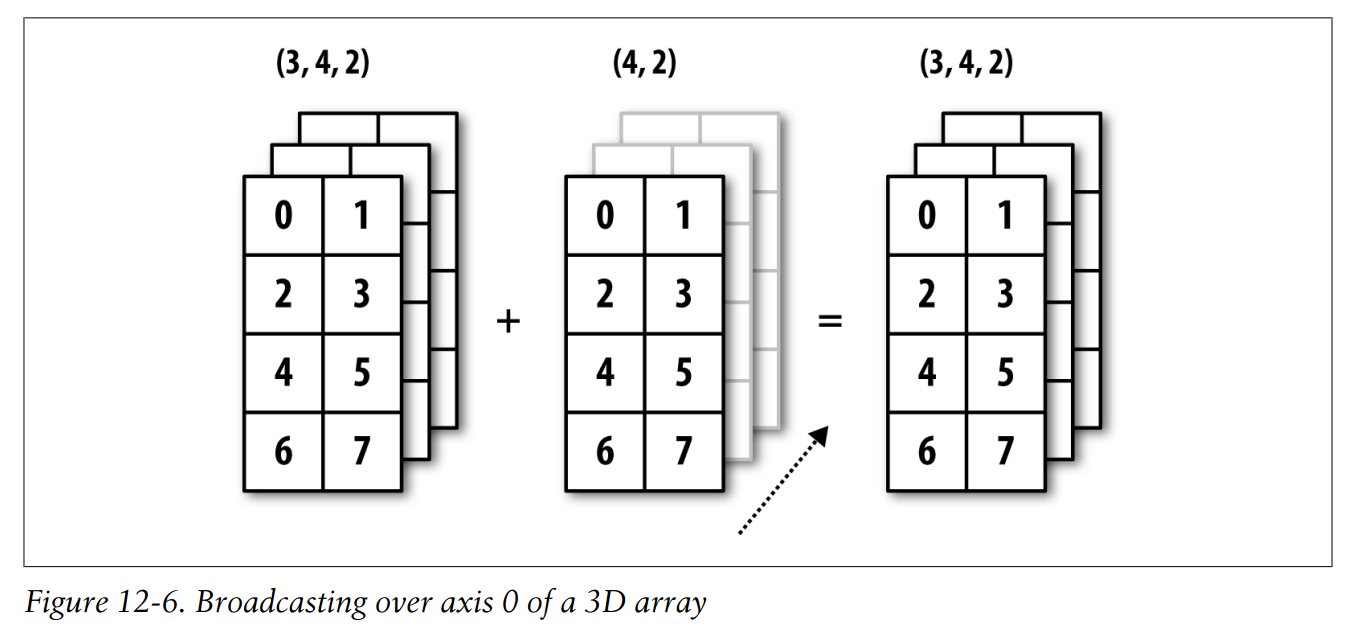

In [71]:
Image('broad3.PNG')

In [67]:
arr

array([[ 0.1243957 ,  0.0681439 ,  1.28128796],
       [ 0.6784056 ,  0.19317847,  0.56162636],
       [-0.65297666,  0.22105882, -0.1006727 ],
       [-0.79476962, -1.03623322,  0.63788785]])

In [68]:
arr.mean(1)

array([ 0.49127585,  0.47773681, -0.17753018, -0.397705  ])

In [69]:
arr - arr.mean(1)

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

According to the broadcasting rule, the “broadcast dimensions” must be 1 in the smaller array

In [70]:
arr - arr.mean(1).reshape((4,1))

array([[-0.36688016, -0.42313195,  0.79001211],
       [ 0.20066879, -0.28455834,  0.08388955],
       [-0.47544648,  0.398589  ,  0.07685748],
       [-0.39706463, -0.63852822,  1.03559285]])

A very common problem, therefore, is needing to add a new axis with length 1 specifically for broadcasting purposes, especially in generic algorithms. Using reshape is one option, but inserting an axis requires constructing a tuple indicating the new shape. This can often be a tedious exercise. Thus, NumPy arrays offer a special syntax for inserting new axes by indexing. We use the special np.newaxis attribute along with “full” slices to insert the new axis

In [72]:
arr = np.zeros((4, 4))

In [76]:
arr_3d = arr[:, np.newaxis, :]

In [78]:
arr_3d.shape

(4L, 1L, 4L)

In [87]:
arr_1d = np.random.normal(size=3)

In [89]:
arr_1d

array([-0.77338103, -1.36221738, -0.07681777])

In [82]:
arr_1d[:, np.newaxis]

array([[ -2.67944885e+00],
       [  1.12941167e+00],
       [ -1.73104786e-03]])

In [85]:
arr_1d[np.newaxis, :]

array([[ -2.67944885e+00,   1.12941167e+00,  -1.73104786e-03]])

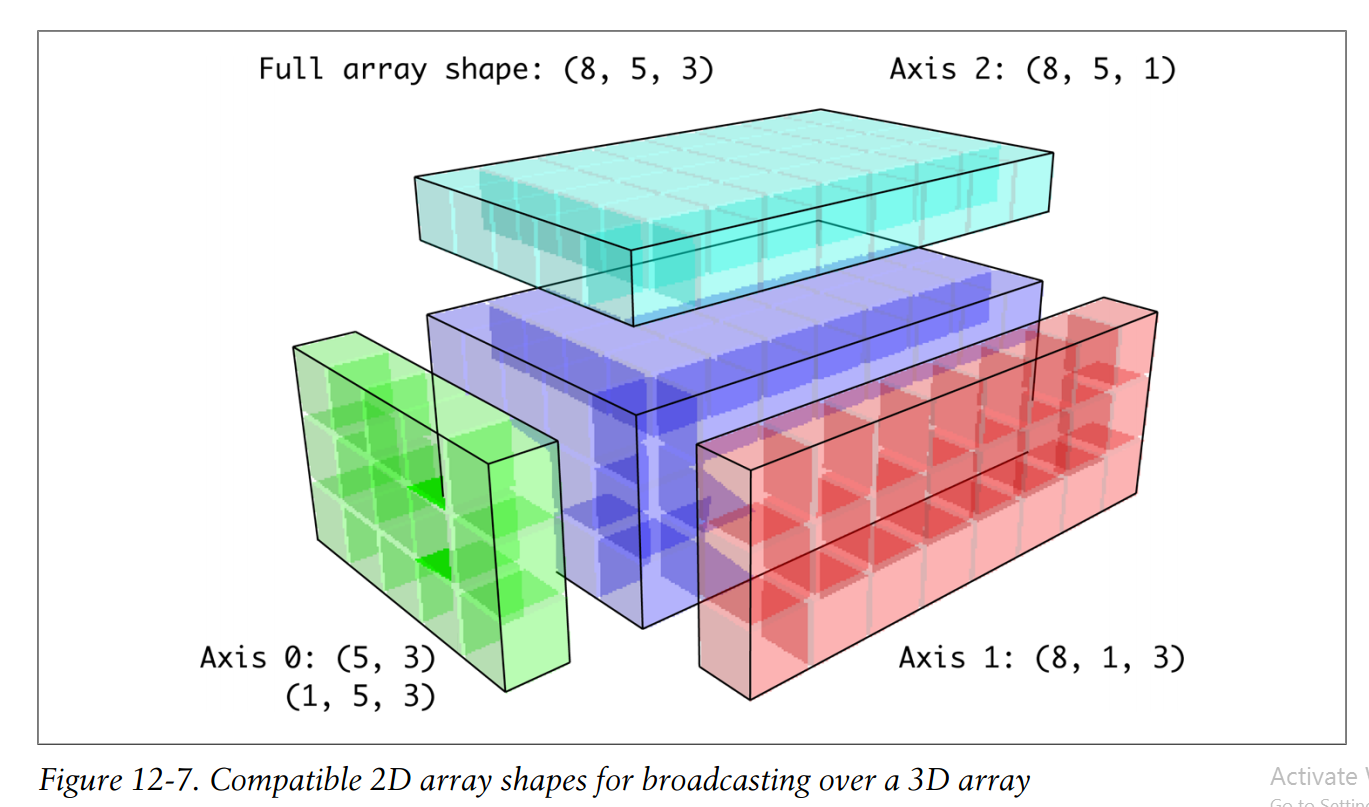

In [90]:
Image('broad4.PNG')

In [91]:
arr = randn(3, 4, 5)

In [92]:
arr

array([[[-0.81665222, -0.3607061 ,  0.54217102,  0.14245821,  1.61392095],
        [-0.00809117,  0.57634251,  0.090738  ,  0.18145052,  0.48000952],
        [ 0.4213346 , -0.16310536,  0.54011677, -0.05026037,  1.39306454],
        [-0.32740694, -0.44728576,  0.06134019, -0.46813451,  0.79656364]],

       [[-0.64554554,  0.27913259,  1.36665245,  0.76180413, -0.05592652],
        [-1.13520386,  0.22381892, -0.08646186, -0.80217705,  0.94865168],
        [-0.35656763,  0.85955177, -0.31389115,  1.43554278, -0.4279279 ],
        [-0.90276849, -0.33392249, -1.98353207,  0.17265204, -1.38142197]],

       [[ 0.18625008,  0.10367016, -0.16802117, -0.82391879,  1.75203883],
        [-1.45736201,  0.19941816,  0.20310243, -0.36044573,  0.1035054 ],
        [ 0.21661095,  0.42957911,  0.44540442, -0.022257  ,  0.31130221],
        [-1.13590649, -0.52475429,  1.65207491,  1.12579474,  1.28781336]]])

In [93]:
depth_means = arr.mean(2)

In [94]:
depth_means

array([[ 0.22423837,  0.26408988,  0.42823004, -0.07698467],
       [ 0.34122342, -0.17027443,  0.23934157, -0.8857986 ],
       [ 0.21000382, -0.26235635,  0.27612794,  0.48100445]])

In [95]:
demeaned = arr - depth_means[:, :, np.newaxis]

In [96]:
demeaned.mean(2)

array([[  0.00000000e+00,  -2.22044605e-17,   0.00000000e+00,
         -2.22044605e-17],
       [  2.22044605e-17,   0.00000000e+00,   2.22044605e-17,
         -4.44089210e-17],
       [  4.44089210e-17,  -5.55111512e-17,  -1.11022302e-17,
         -4.44089210e-17]])

##### ufunc Instance Methods

reduce takes a single array and aggregates its values, optionally along an axis, by performing a sequence of binary operations.

In [2]:
np.add.reduce(np.arange(10))

45

In [4]:
9*10/2

45

In [7]:
arr = randn(5, 5)

In [8]:
arr

array([[  1.38753362e+00,   5.58090749e-01,   8.06501506e-01,
         -1.51726240e+00,   1.30271675e+00],
       [  1.12267786e+00,  -8.68218770e-01,   2.41241387e+00,
          4.94628092e-01,  -7.55222758e-01],
       [ -4.76362665e-01,   1.06693928e+00,   4.99528519e-01,
          1.12468268e+00,   4.35024003e-01],
       [  8.76932096e-01,   1.03502299e-01,  -2.24009345e+00,
         -3.56812327e-01,  -2.67859139e-04],
       [ -1.35232286e+00,  -2.92671586e-01,   4.92829668e-01,
          7.77965003e-01,  -5.71807737e-02]])